<a href="https://colab.research.google.com/github/Deepthi120-ai/Weather-Prediction/blob/main/Weather2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.pylab import rcParams


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Delhi_dataset2.xls to Delhi_dataset2.xls


In [ ]:
data=pd.read_excel('Delhi_dataset2.xls')
data[0:6]

,Datetime,Weather,Dew-point,Fog,Hail,Humidity,Pressure,Rain,Snow,Temperature,Thunder,Tornado,Visibility,Wind_Direction_degrees,Wind_Direction,Wind_Speed
0,2007-01-01 00:00:00,Heavy Fog,10.0,1,0,97.0,1017.0,0,0,11.0,0,0,0.02,290,North-West,5.6
1,2007-01-01 03:00:00,Heavy Fog,11.0,1,0,100.0,1019.0,0,0,11.0,0,0,0.02,290,North-West,5.6
2,2007-01-01 06:00:00,Heavy Fog,11.0,1,0,92.0,1020.0,0,0,12.0,0,0,0.20,320,North-West,5.6
3,2007-01-01 09:00:00,Heavy Fog,12.0,1,0,85.0,1018.0,0,0,13.0,0,0,0.20,320,North-West,7.4
4,2007-01-01 12:00:00,Heavy Fog,11.0,1,0,84.0,1017.0,0,0,14.0,0,0,0.20,290,North-West,3.7
5,2007-01-01 15:00:00,Heavy Fog,11.0,1,0,92.0,1018.0,0,0,12.0,0,0,0.20,270,West,5.6


## **Using Data enterred by User**

In [ ]:
#import datetime as dt
#df=data
#date=dt.datetime(2016,9,1)
#x=pd.Timestamp(date).to_period(freq ='M')
#obs=df[ df['Datetime'].dt.to_period('M').between(x,x)]

#obs.Datetime=pd.to_datetime(obs.Datetime)
#obs.set_index('Datetime', inplace=True)

import pandas as pd
import datetime as dt
df=data
d=int(input("enter day:\n"))
m=int(input("enter month:\n"))
y=int(input("enter year:\n"))

date=dt.datetime(y,m,d)
print(date)

x=pd.Timestamp(date).to_period(freq ='M')
obs= df[df['Datetime'].dt.to_period('M').between(x,x)]
obs.set_index('Datetime',inplace=True)








enter day:
9
enter month:
9
enter year:
2016
2016-09-09 00:00:00


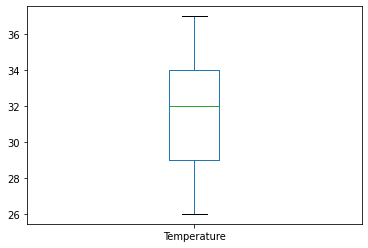

In [ ]:
obs.boxplot( column =['Temperature'], grid = False)


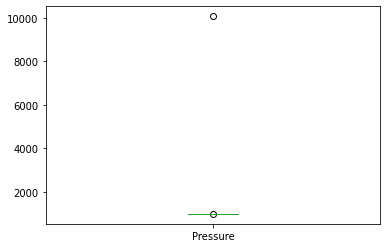

In [ ]:
obs.boxplot( column =['Pressure'], grid = False)


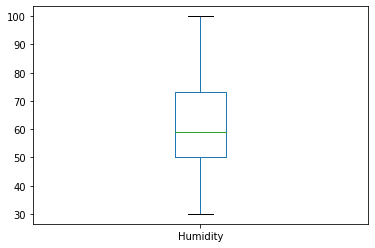

In [ ]:
obs.boxplot( column =['Humidity'], grid = False)


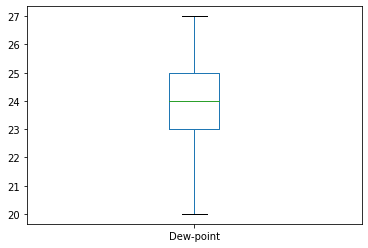

In [ ]:
obs.boxplot( column =['Dew-point'], grid = False)


In [ ]:
indexnames1=obs[obs.Pressure==obs.Pressure.max()].index
obs.drop(indexnames1,inplace=True)
indexnames2=obs[obs.Pressure==obs.Pressure.min()].index
obs.drop(indexnames2,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


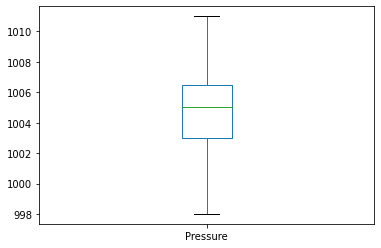

In [ ]:
obs.boxplot( column =['Pressure'], grid = False)

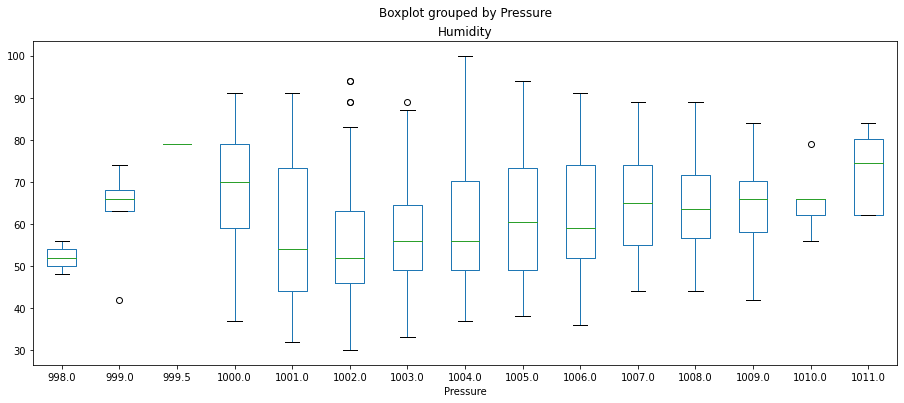

In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
obs.boxplot(by ='Pressure', column =['Humidity'], grid = False)


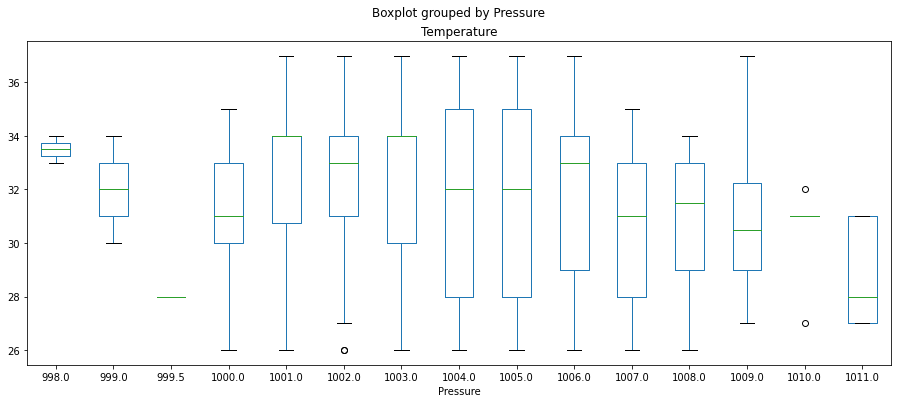

In [ ]:
obs.boxplot(by ='Pressure', column =['Temperature'], grid = False)

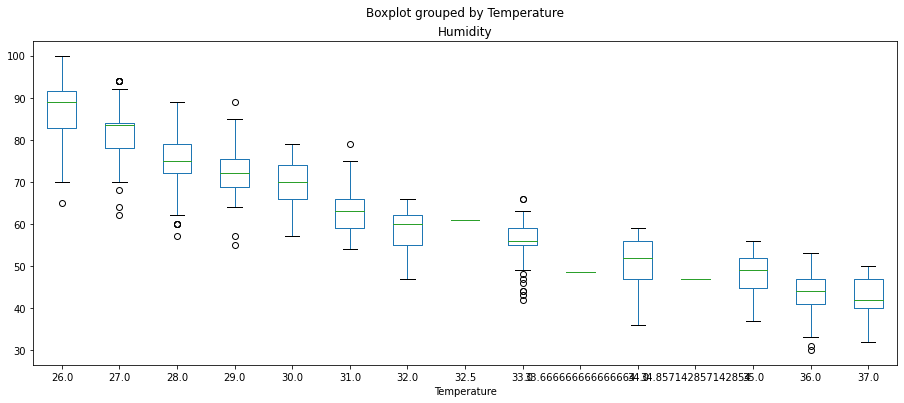

In [ ]:
obs.boxplot(by ='Temperature', column =['Humidity'], grid = False)

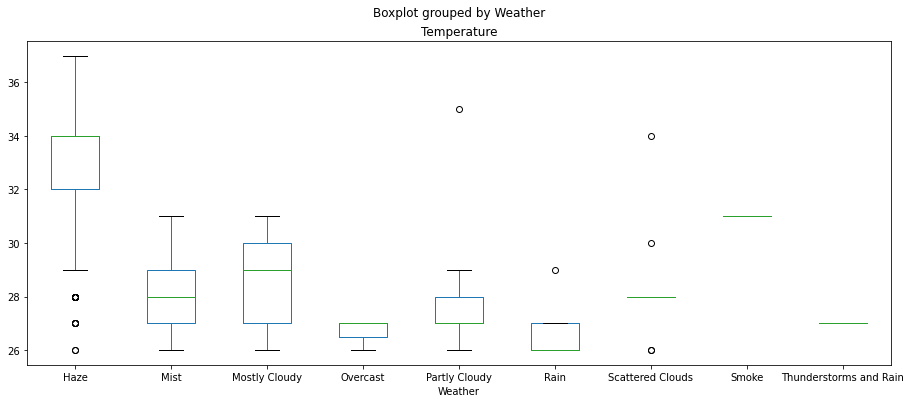

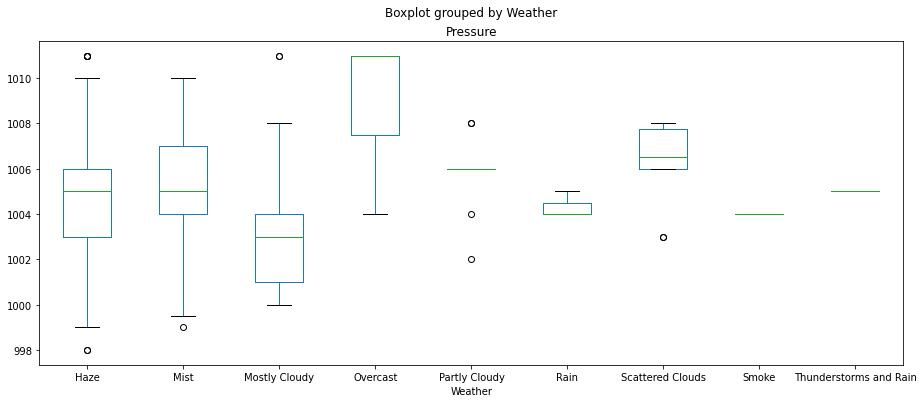

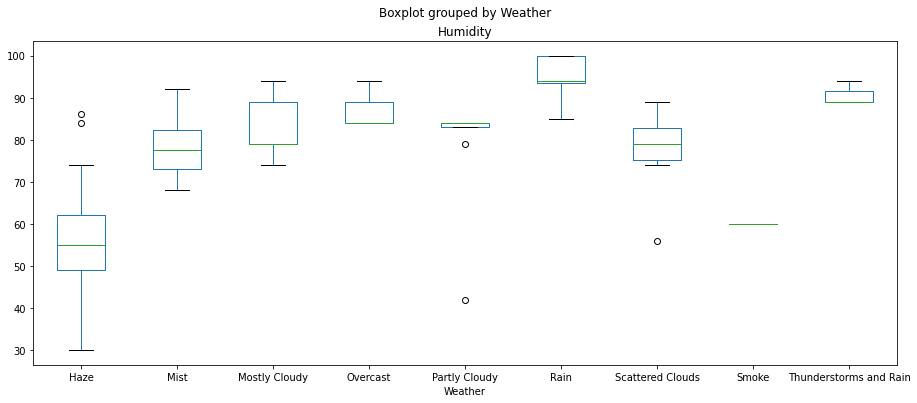

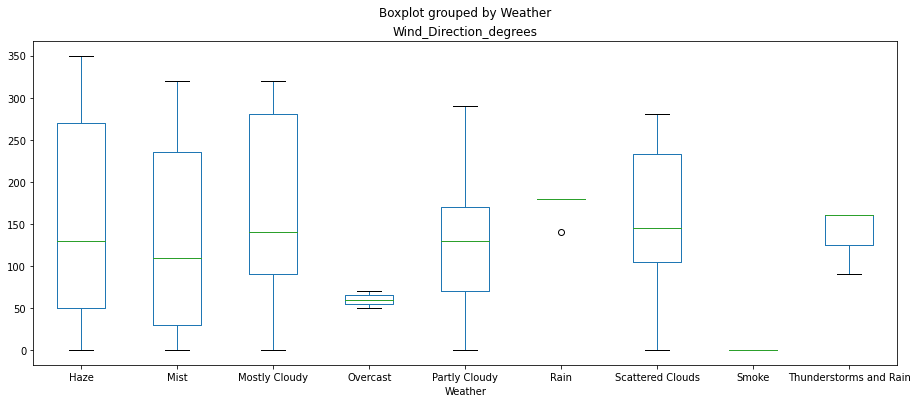

In [ ]:
obs.boxplot(by ='Weather', column =['Temperature'], grid = False)
obs.boxplot(by ='Weather', column =['Pressure'], grid = False)
obs.boxplot(by ='Weather', column =['Humidity'], grid = False)
obs.boxplot(by ='Weather', column =['Wind_Direction_degrees'], grid = False)

## **To use months of all years to analyse the weather in a particular month!!**

                 Datetime Weather  ...  Wind_Direction  Wind_Speed
1916  2007-09-01 00:00:00    Mist  ...            East         1.9
1917  2007-09-01 03:00:00    Mist  ...      South-East         3.7
1918  2007-09-01 06:00:00    Haze  ...            East         3.7
1919  2007-09-01 09:00:00    Haze  ...            East         5.6
1920  2007-09-01 12:00:00    Haze  ...           South         7.4
...                   ...     ...  ...             ...         ...
29327 2016-09-30 12:30:00    Haze  ...      North-East         3.7
29328 2016-09-30 13:00:00    Haze  ...           North         0.0
29329 2016-09-30 15:00:00   Smoke  ...           North         0.0
29330 2016-09-30 18:00:00    Mist  ...           North         0.0
29331 2016-09-30 21:00:00    Mist  ...           North         0.0

[2568 rows x 16 columns]


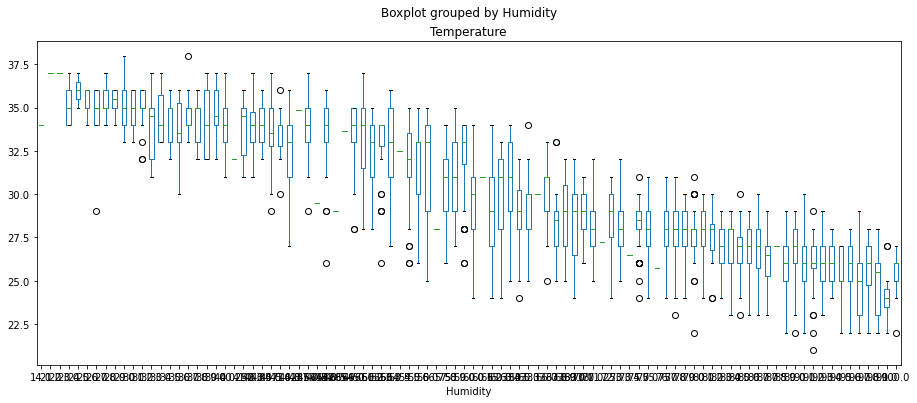

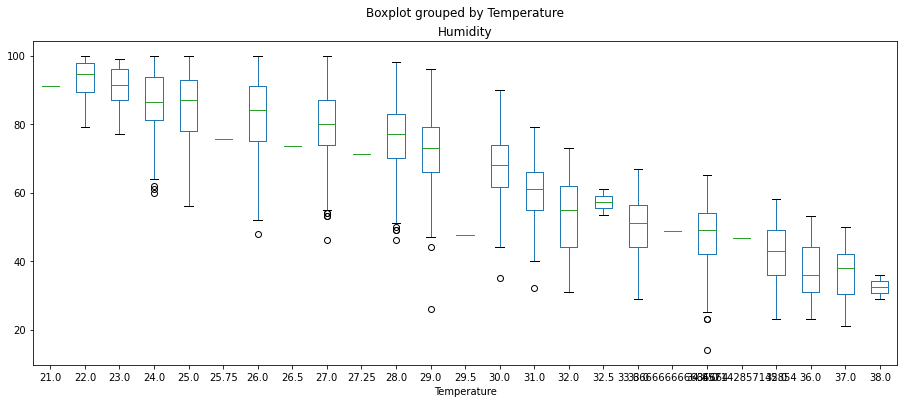

In [ ]:
m=date.month
obs1=df['Datetime'].dt.month.between(m,m)
df_obs1=df.loc[obs1]
print(df_obs1)

df_obs1.boxplot(by ='Humidity', column =['Temperature'], grid = False)
df_obs1.boxplot(by ='Temperature', column =['Humidity'], grid = False)

## **Normalizing the Data**

In [ ]:
X_Data1=obs[["Dew-point","Humidity","Pressure","Temperature"]]
X_Data=X_Data1.apply(lambda x:(x - x.min(axis=0) )/(x.max(axis=0) - x.min(axis=0) ))
X_Data

,Dew-point,Humidity,Pressure,Temperature
Datetime,,,,
2016-09-01 00:00:00,0.714286,0.842857,0.307692,0.000000
2016-09-01 02:00:00,0.714286,0.914286,0.461538,0.000000
2016-09-01 02:30:00,0.714286,0.914286,0.461538,0.000000
2016-09-01 03:00:00,0.714286,0.814286,0.384615,0.090909
2016-09-01 03:30:00,0.857143,0.914286,0.538462,0.090909
...,...,...,...,...
2016-09-30 12:30:00,0.428571,0.314286,0.461538,0.727273
2016-09-30 13:00:00,0.428571,0.357143,0.461538,0.636364
2016-09-30 15:00:00,0.571429,0.428571,0.461538,0.454545


In [ ]:
from sklearn.preprocessing import StandardScaler
stndrd=StandardScaler()
X_Data2=stndrd.fit_transform(X_Data1)
X_Data2

array([[ 0.97955417,  1.8966653 , -1.16407562, -1.8021734 ],
       [ 0.97955417,  2.24600986, -0.32972679, -1.8021734 ],
       [ 0.97955417,  2.24600986, -0.32972679, -1.8021734 ],
       ...,
       [ 0.17458124, -0.12953313, -0.32972679, -0.17538802],
       [ 0.97955417,  0.70889381,  0.08744763, -0.82610217],
       [ 0.97955417,  1.05823836,  0.50462205, -1.15145925]])

## **Plotting Line Graphs of the factors against the Date**

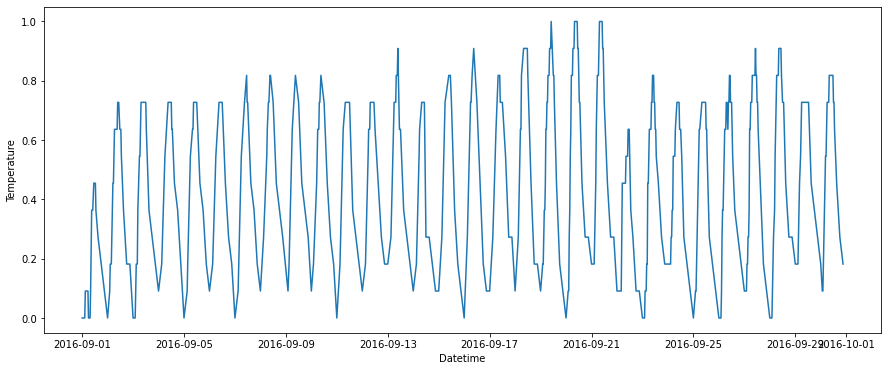

In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
TvD=X_Data["Temperature"]
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.plot(TvD)


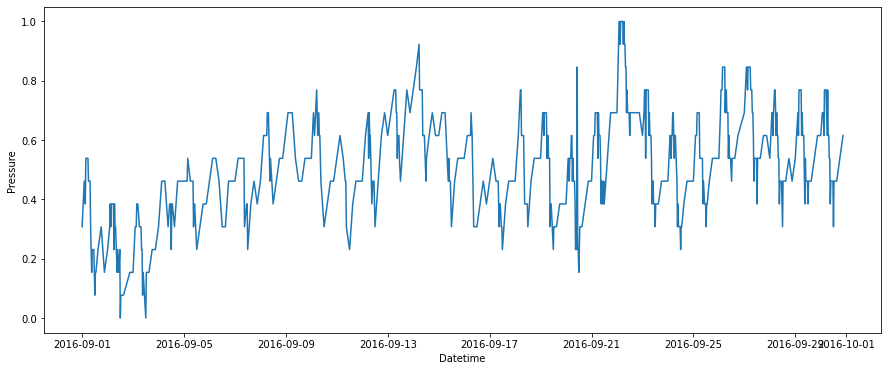

In [ ]:
PvD=X_Data["Pressure"]
plt.xlabel('Datetime')
plt.ylabel('Pressure')
plt.plot(PvD)

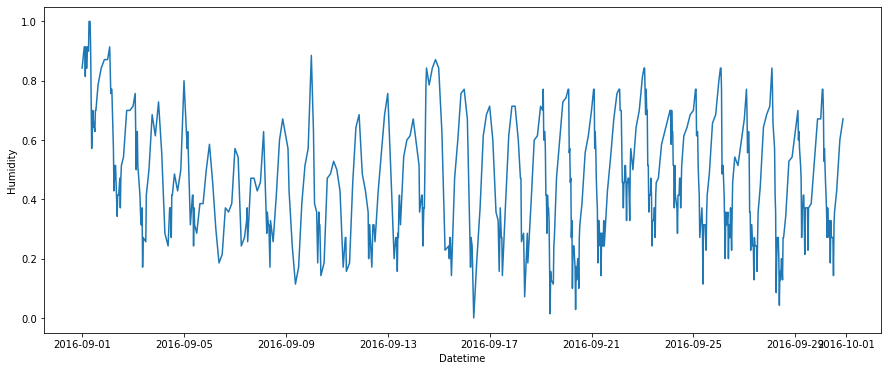

In [ ]:
HvD=X_Data["Humidity"]
plt.xlabel('Datetime')
plt.ylabel('Humidity')
plt.plot(HvD)

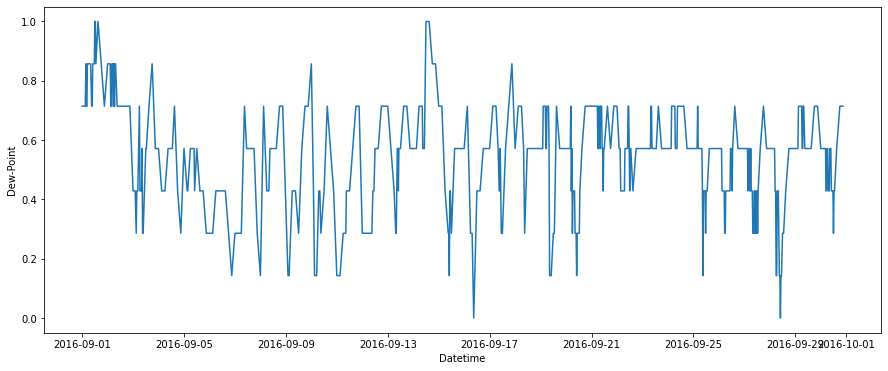

In [ ]:
DPvD=X_Data["Dew-point"]
plt.xlabel('Datetime')
plt.ylabel('Dew-Point')
plt.plot(DPvD)

In [ ]:
X_Data.describe()

,Dew-point,Humidity,Pressure,Temperature
count,551.000000,551.000000,551.000000,551.000000
mean,0.540446,0.455056,0.522337,0.503551
std,0.177630,0.204650,0.184558,0.279667
min,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.285714,0.384615,0.272727
50%,0.571429,0.414286,0.538462,0.545455
75%,0.714286,0.614286,0.653846,0.727273
max,1.000000,1.000000,1.000000,1.000000


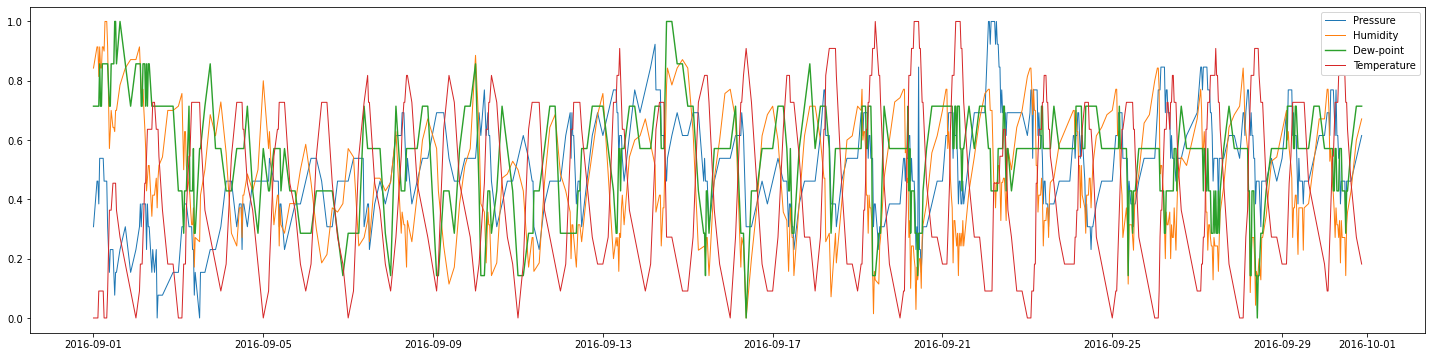

In [ ]:
plt.rcParams["figure.figsize"] = (25, 6)
line1,=plt.plot(X_Data.Pressure,label='Pressure',linewidth=1)
line2,=plt.plot(X_Data.Humidity,label='Humidity',linewidth=1)
line3,=plt.plot(X_Data["Dew-point"],label='Dew-point',linewidth=1.4)
line4,=plt.plot(X_Data.Temperature,label='Temperature',linewidth=1);
plt.legend(handles=[line1,line2,line3,line4],loc='upper right')

Humidity and Dew-Point are directly proportional. Temperature is inversely proportional to Humidity and Dew-point.We would like to assume that Temperature & Pressure are determining factors for humidity and Dew-point and prove this assumption based on time-lag.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


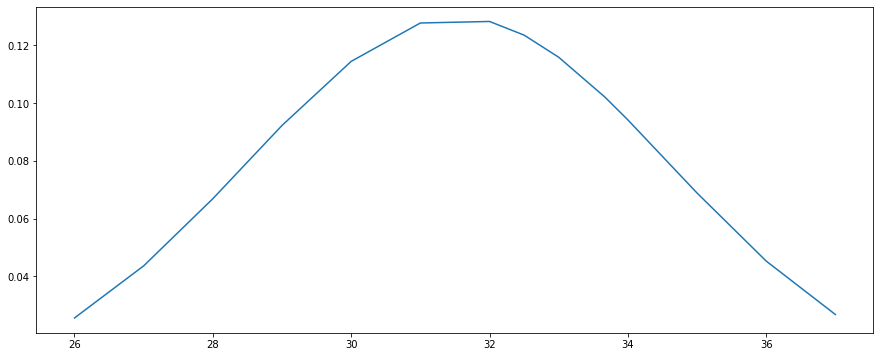

In [ ]:
import scipy
plt.rcParams["figure.figsize"] = (15, 6)
mean=obs["Temperature"].mean()
std=obs["Temperature"].std()
obs.sort_values(by="Temperature",inplace=True)
x_values=obs["Temperature"]
y_values=scipy.stats.norm(mean, std)
plt.plot(x_values, y_values.pdf(x_values))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


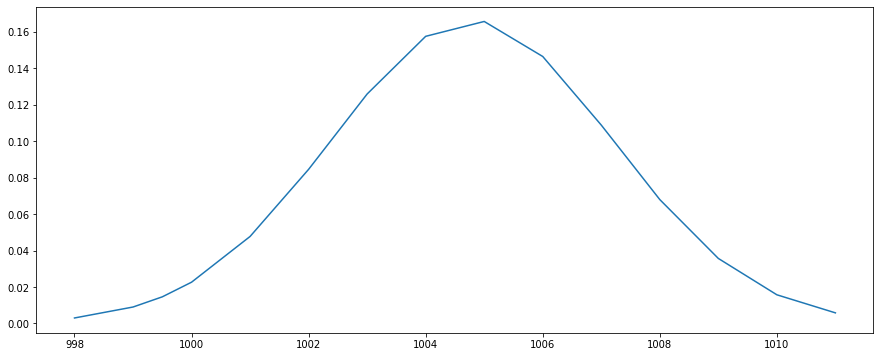

In [ ]:
mean=obs["Pressure"].mean()
std=obs["Pressure"].std()
obs.sort_values(by="Pressure",inplace=True)
x_values=obs["Pressure"]
y_values=scipy.stats.norm(mean, std)
plt.plot(x_values, y_values.pdf(x_values))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


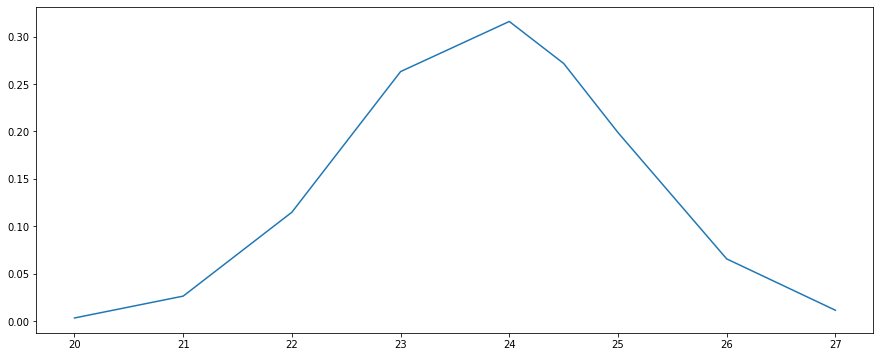

In [ ]:
mean=obs["Dew-point"].mean()
std=obs["Dew-point"].std()
obs.sort_values(by="Dew-point",inplace=True)
x_values=obs["Dew-point"]
y_values=scipy.stats.norm(mean, std)
plt.plot(x_values, y_values.pdf(x_values))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


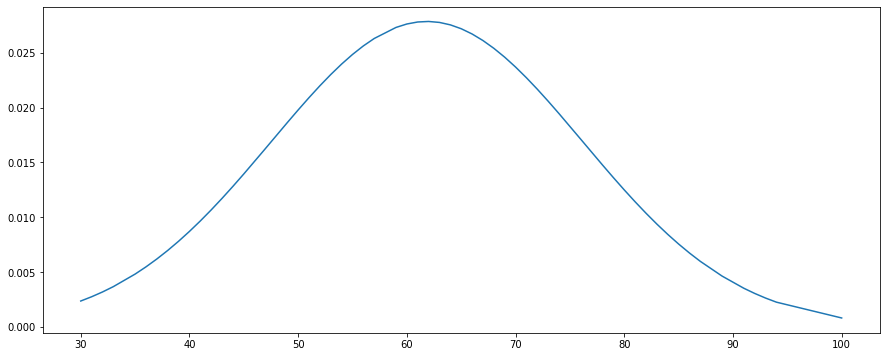

In [ ]:
mean=obs["Humidity"].mean()
std=obs["Humidity"].std()
obs.sort_values(by="Humidity",inplace=True)
x_values=obs["Humidity"]
y_values=scipy.stats.norm(mean, std)
plt.plot(x_values, y_values.pdf(x_values))

Hypothesis

In [ ]:
#Temperature value assumed as 38 
mean=obs["Temperature"].mean()
std=obs["Temperature"].std()
zv=(mean-38)/std
zv

-2.1002031067156017

In [ ]:
#Humidity value assumed 33
mean=obs["Humidity"].mean()
std=obs["Humidity"].std()
zv=(mean-33)/std
zv

2.014163522021753

In [ ]:
mean=obs["Pressure"].mean()
std=obs["Pressure"].std()
zv=(mean-1000/std)
zv

587.9946970129081

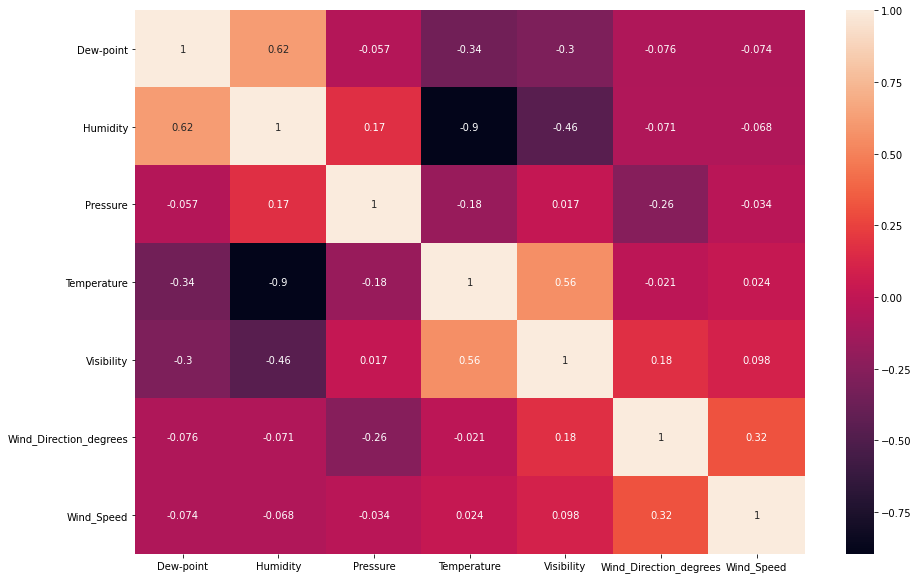

In [ ]:
import seaborn as sns

heat=obs[["Dew-point","Humidity","Pressure","Temperature","Visibility","Wind_Direction_degrees","Wind_Speed"]]
plt.figure(figsize=(15,10))
sns.heatmap(heat.corr(),annot=True)